In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def forward_euler(f, var0, dt, t_max):
    """This function takes a function f (containing a number of coupled first order ODEs), an array of initial values of the variables var0, a stepsize for the timesteps dt and a maximum time t_max. The function returns solutions to the coupled ODEs using a forward Euler method."""

    t = np.arange(0, t_max, dt)  #initialize array of time values
    var = np.copy(var0)  #initialize array of variables (x, y, z, ect.)
    var_save = np.zeros((len(var0), len(t)))  #initialize array for solutions
    
    for i in range(len(t)):  #perform forward Euler method
        f_i = f(t, var)
        var += dt * f_i
        var_save[:, i] = var
        
    return var_save, t  #return solutions and timesteps


def fourth_runge_kutta(f, var0, dt, t_max):
    """This function takes a function f (containing a number of coupled first order ODEs), an array of initial values of the variables var0, a stepsize for the timesteps dt and a maximum time t_max. The function returns solutions to the coupled ODEs using a fourth order Runge-Kutta method."""
    
    t = np.arange(0, t_max, dt)  #initialize arrat of time values
    var = np.copy(var0)  #initialize array of variables (x, y, z, ect.)
    var_save = np.zeros((len(var0), len(t)))  #initialize array for solutions
    
    for i in range(len(t)):  #perform fourth order Runge-Kutta method
        k1 = f(t, var)
        k2 = f(t+dt/2, var+dt*k1/2)
        k3 = f(t+dt/2, var+dt*k2/2)
        k4 = f(t+dt, var+dt*k3)
        
        var += dt/6 * (k1 + 2*k2 + 2*k3 + k4)
        var_save[:, i] = var
    
    return var_save, t  #return solutions and timesteps

In [3]:
pop = np.array([5, 5, 100, 100])  #array with population sizes (used to calculate percent infected individuals in a group)

In [4]:
#This function contains the coupled ODEs for the spread of the infection (without blood transfusions and removal)

def F(t, var, par):
    
    a1, a2, b1, b2, b3, c1, c2, d1, p1, p2, q, r = par
    
    x1 = var[0]
    x2 = var[1]
    y = var[2]
    z = var[3]
    
    dx1dt = a1 * x1 * (p1 - x1) + a2 * x2 * (p1 - x1)
    dx2dt = b1 * x1 * (p2 - x2) + b2 * x2 * (p2 - x2) + b3 * y * (p2 - x2)
    dydt = c1 * x2 * (q - y) + c2 * z * (q - y)
    dzdt = d1 * y * (r - z)
    
    return np.array([dx1dt, dx2dt, dydt, dzdt])

In [5]:
#Here I restrict the above function to the parameter values given in the assignment using a closure

def F_restricted(t, var):
    par = np.array([10, 5, 5, 1, 1, 1, 1, 1, 5, 5, 100, 100])
    return F(t, var, par)

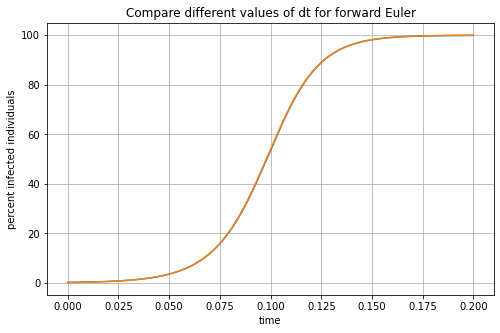

In [6]:
#I compare different values of dt for the forward Euler method in order to determine approximately for which dt the solution converges

dt_test = np.array([0.0001, 0.00001])

plt.figure(figsize=(8,5))
plt.title("Compare different values of dt for forward Euler")
plt.ylabel("percent infected individuals")
plt.xlabel("time")
plt.grid()

for dt in dt_test:
    sol_E_test, t_E_test = forward_euler(F_restricted, var0=np.array([0.01, 0, 0, 0]), dt=dt, t_max=0.2)
    plt.plot(t_E_test, sol_E_test[0,:]/pop[0]*100)

For the forward Euler method, I can't tell the difference between $dt=0.0001$ and $dt=0.00001$ so I choose to use $dt=0.0001$ for the forward Euler method in the rest of the assignment.

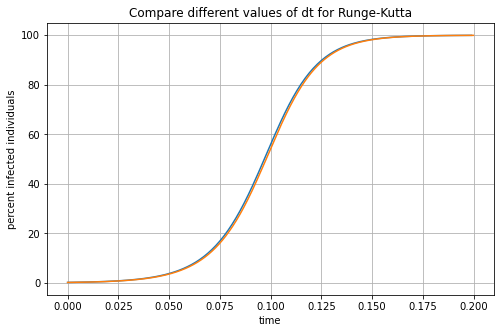

In [7]:
#I compare different values of dt for the fourth order Runge-Kutta method in order to determine approximately for which dt the solution converges

dt_test = np.array([0.001, 0.0001])

plt.figure(figsize=(8,5))
plt.title("Compare different values of dt for Runge-Kutta")
plt.ylabel("percent infected individuals")
plt.xlabel("time")
plt.grid()

for dt in dt_test:
    sol_RK_test, t_RK_test = fourth_runge_kutta(F_restricted, var0=np.array([0.01, 0, 0, 0]), dt=dt, t_max=0.2)
    plt.plot(t_RK_test, sol_RK_test[0,:]/pop[0]*100)

For the fourth order Runge-Kutta method, I can barely tell the difference between 𝑑𝑡=0.001 and 𝑑𝑡=0.0001 so I choose to use 𝑑𝑡=0.001 for the fourth order Runge-Kutta method in the rest of the assignment.

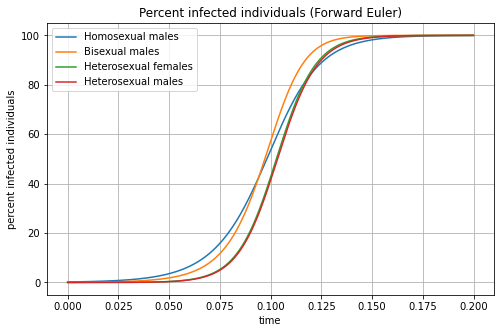

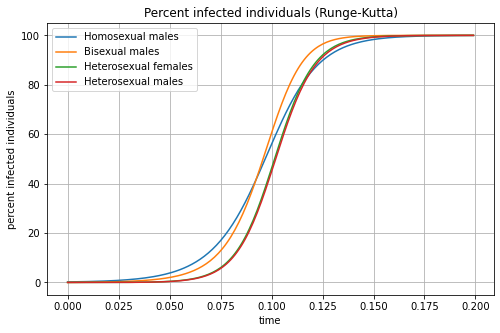

In [8]:
#I simulate how the infection spreads in the different groups using both methods
#This simulation is without blood transfusions and removal

sol_E, t_E = forward_euler(F_restricted, var0=np.array([0.01, 0, 0, 0]), dt=0.0001, t_max=0.2)
sol_RK, t_RK = fourth_runge_kutta(F_restricted, var0=np.array([0.01, 0, 0, 0]), dt=0.001, t_max=0.2)


#Plot the results

lables = ["Homosexual males", "Bisexual males", "Heterosexual females", "Heterosexual males"]

plt.figure(figsize=(8,5))
plt.grid()
for i in range(4):
    plt.plot(t_E, sol_E[i,:]/pop[i]*100, label=lables[i])
    plt.title("Percent infected individuals (Forward Euler)")
    plt.ylabel("percent infected individuals")
    plt.xlabel("time")
    plt.legend()
    
plt.figure(figsize=(8,5))
plt.grid()
for i in range(4):
    plt.plot(t_RK, sol_RK[i,:]/pop[i]*100, label=lables[i])
    plt.title("Percent infected individuals (Runge-Kutta)")
    plt.ylabel("percent infected individuals")
    plt.xlabel("time")
    plt.legend()

In [9]:
#Here I add the effect of blood transfusions to the ODEs

def F1(t, var, par, e):
    
    a1, a2, b1, b2, b3, c1, c2, d1, p1, p2, q, r = par
    
    x1 = var[0]
    x2 = var[1]
    y = var[2]
    z = var[3]
    
    dx1dt = a1 * x1 * (p1 - x1) + a2 * x2 * (p1 - x1) + e * (p1 - x1)
    dx2dt = b1 * x1 * (p2 - x2) + b2 * x2 * (p2 - x2) + b3 * y * (p2 - x2) + e * (p2 - x2)
    dydt = c1 * x2 * (q - y) + c2 * z * (q - y) + e * (q - y)
    dzdt = d1 * y * (r - z) + e * (r - z)
    
    return np.array([dx1dt, dx2dt, dydt, dzdt])

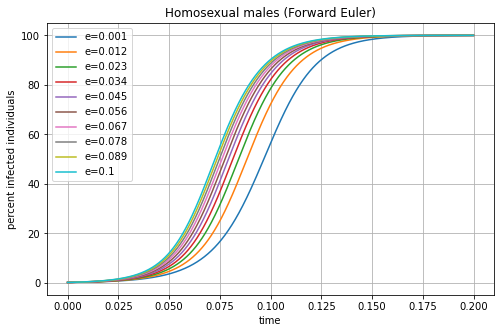

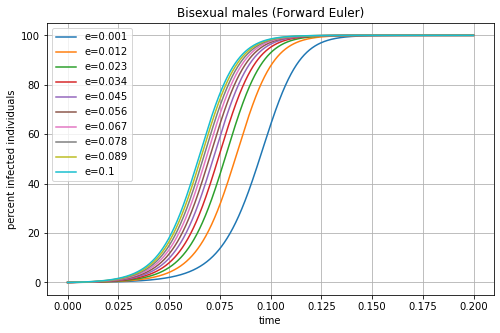

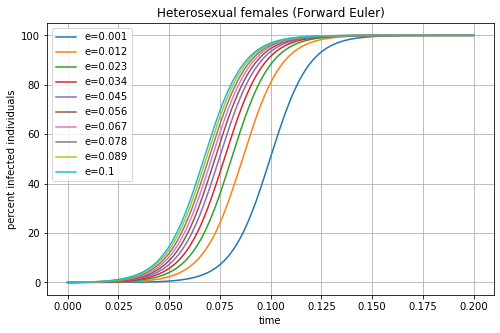

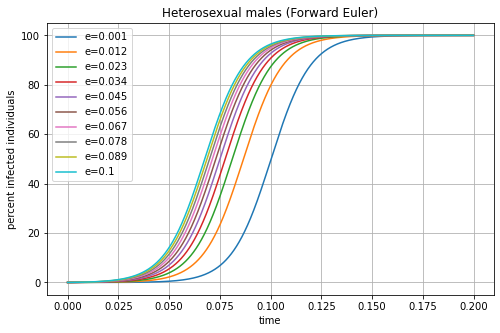

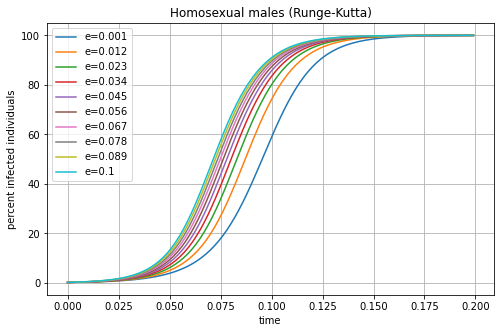

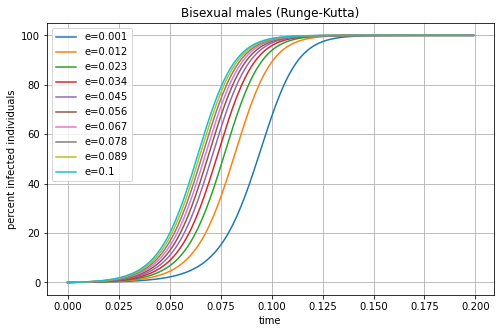

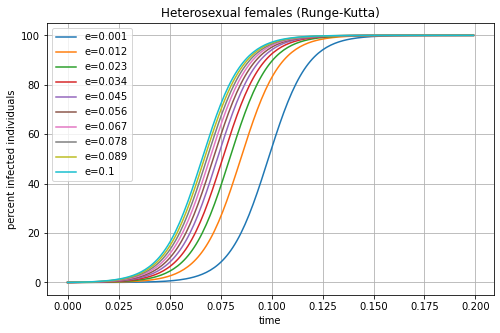

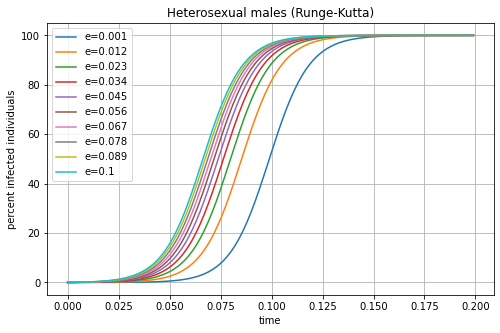

In [10]:
e_array = np.linspace(0.001, 0.1, 10)  #I want to check how the infection spreads for 10 different values of e between 0.001 and 1

sol_E_e_list = []  #initialize lists for solutions
sol_RK_e_list = []

for e_i in e_array:  #simulate every value of e
    
    def F1_restricted(t, var):  #restrict the ODE to the parameters given in the assignment and the current value of e
        par = np.array([10, 5, 5, 1, 1, 1, 1, 1, 5, 5, 100, 100])
        e = e_i
        return F1(t, var, par, e)
    
    #solve the ODEs
    sol_E_e, t_E_e = forward_euler(F1_restricted, var0=np.array([0.01, 0, 0, 0]), dt=0.0001, t_max=0.2)
    sol_RK_e, t_RK_e = fourth_runge_kutta(F1_restricted, var0=np.array([0.01, 0, 0, 0]), dt=0.001, t_max=0.2)
    
    #add current solutions to lists
    sol_RK_e_list.append(sol_RK_e)
    sol_E_e_list.append(sol_E_e)


#Plot the results
for i in range(4):
    plt.figure(figsize=(8,5))
    plt.grid()
    for j in range(len(e_array)):
        plt.plot(t_E_e, sol_E_e_list[j][i,:]/pop[i]*100, label=f"e={np.round(e_array[j],4)}")
        plt.title(f"{lables[i]} (Forward Euler)")
        plt.ylabel("percent infected individuals")
        plt.xlabel("time")
        plt.legend()
    
for i in range(4):
    plt.figure(figsize=(8,5))
    plt.grid()
    for j in range(len(e_array)):
        plt.plot(t_RK_e, sol_RK_e_list[j][i,:]/pop[i]*100, label=f"e={np.round(e_array[j],4)}")
        plt.title(f"{lables[i]} (Runge-Kutta)")
        plt.ylabel("percent infected individuals")
        plt.xlabel("time")
        plt.legend()


I notice that the higher e is, the faster the infection is 100 % of the population in a group.

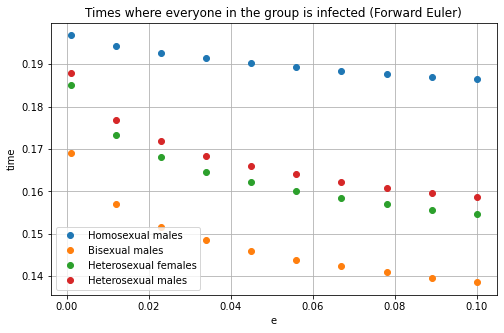

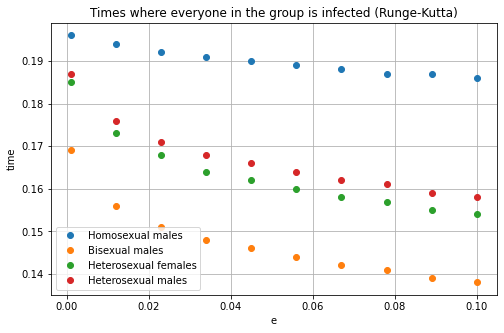

In [11]:
#I want to determine the time where 100 % of the population in a group is infected for different values of e

time_all_infected_E = np.zeros((4, len(e_array)))  #initialize arrays for times where infection is 100 %
time_all_infected_RK = np.zeros((4, len(e_array)))

for k in range(len(e_array)):
    
    def F1_restricted(t, var):  #restrict ODEs to parameters given in the assignment and current value of e
        par = np.array([10, 5, 5, 1, 1, 1, 1, 1, 5, 5, 100, 100])
        e = e_array[k]
        return F1(t, var, par, e)
    
    #solve ODEs
    sol_E, t_E = forward_euler(F1_restricted, var0=np.array([0.01, 0, 0, 0]), dt=0.0001, t_max=0.2)
    sol_RK, t_RK = fourth_runge_kutta(F1_restricted, var0=np.array([0.01, 0, 0, 0]), dt=0.001, t_max=0.2)
    
    for i in range(4):
        for j in range(len(sol_E[i,:])):
            if sol_E[i,j]/np.max(sol_E[i,:])*100 >= 99.99:  #when 99.99 % of individuals in a group is infected, save the time
                time_all_infected_E[i,k] = t_E[j]
                break
        for j in range(len(sol_RK[i,:])):
            if sol_RK[i,j]/np.max(sol_RK[i,:])*100 >= 99.99:
                time_all_infected_RK[i,k] = t_RK[j]
                break


#Plot the results

plt.figure(figsize=(8,5))
plt.grid()
for i in range(4):
    plt.plot(e_array, time_all_infected_E[i,:], "o", label=lables[i])
    plt.title("Times where everyone in the group is infected (Forward Euler)")
    plt.ylabel("time")
    plt.xlabel("e")
    plt.legend()

plt.figure(figsize=(8,5))
plt.grid()
for i in range(4):
    plt.plot(e_array, time_all_infected_RK[i,:], "o", label=lables[i])
    plt.title("Times where everyone in the group is infected (Runge-Kutta)")
    plt.ylabel("time")
    plt.xlabel("e")
    plt.legend()
    

In [12]:
#Next I define e=0.01*frac

def F2(t, var, par):
    
    a1, a2, b1, b2, b3, c1, c2, d1, p1, p2, q, r = par
    
    x1 = var[0]
    x2 = var[1]
    y = var[2]
    z = var[3]
    
    frac = (x1 + x2 + y + z) / (p1 + p2 + q + r)
    e = 0.01 * frac
    
    dx1dt = a1 * x1 * (p1 - x1) + a2 * x2 * (p1 - x1) + e * (p1 - x1)
    dx2dt = b1 * x1 * (p2 - x2) + b2 * x2 * (p2 - x2) + b3 * y * (p2 - x2) + e * (p2 - x2)
    dydt = c1 * x2 * (q - y) + c2 * z * (q - y) + e * (q - y)
    dzdt = d1 * y * (r - z) + e * (r - z)
    
    return np.array([dx1dt, dx2dt, dydt, dzdt])

In [13]:
#I restrict the ODEs to the given parameters

def F2_restricted(t, var):
    par = np.array([10, 5, 5, 1, 1, 1, 1, 1, 5, 5, 100, 100])
    return F2(t, var, par)

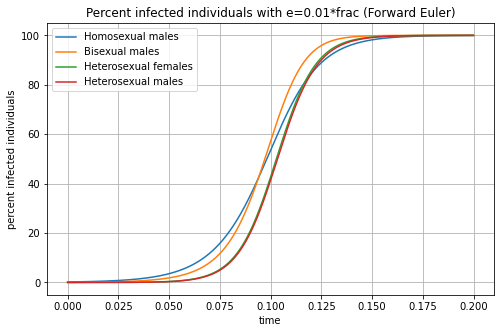

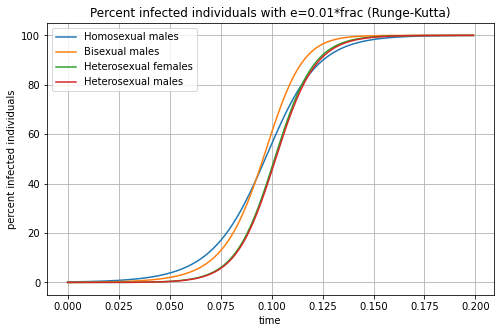

In [14]:
#simulate how the infection spreads
sol2_E, t2_E = forward_euler(F2_restricted, var0=np.array([0.01, 0, 0, 0]), dt=0.0001, t_max=0.2)
sol2_RK, t2_RK = fourth_runge_kutta(F2_restricted, var0=np.array([0.01, 0, 0, 0]), dt=0.001, t_max=0.2)


#Plot the results
plt.figure(figsize=(8,5))
plt.grid()
for i in range(4):
    plt.plot(t2_E, sol2_E[i,:]/pop[i]*100, label=lables[i])
    plt.title("Percent infected individuals with e=0.01*frac (Forward Euler)")
    plt.ylabel("percent infected individuals")
    plt.xlabel("time")
    plt.legend()

plt.figure(figsize=(8,5))
plt.grid()
for i in range(4):
    plt.plot(t2_RK, sol2_RK[i,:]/pop[i]*100, label=lables[i])
    plt.title("Percent infected individuals with e=0.01*frac (Runge-Kutta)")
    plt.ylabel("percent infected individuals")
    plt.xlabel("time")
    plt.legend()

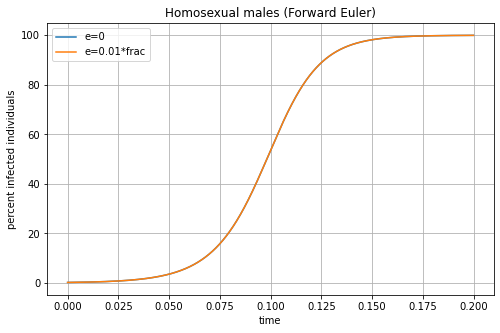

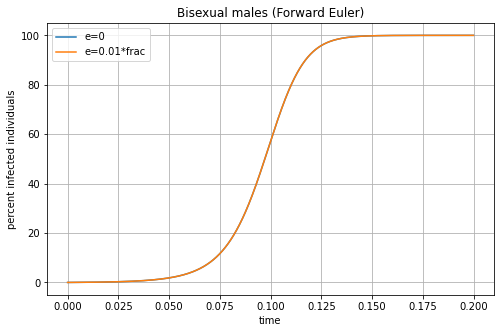

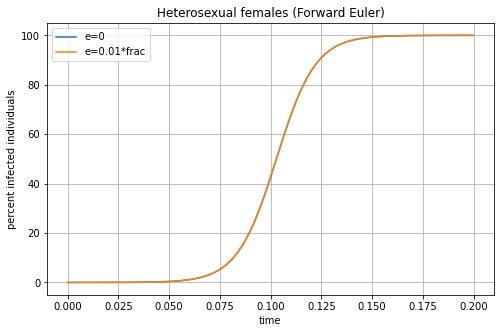

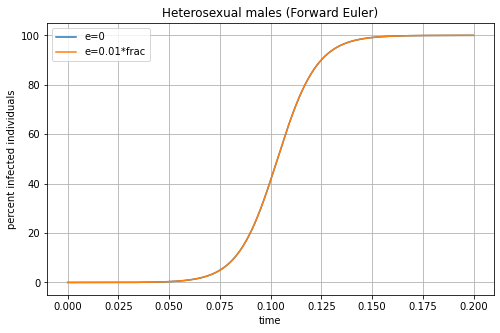

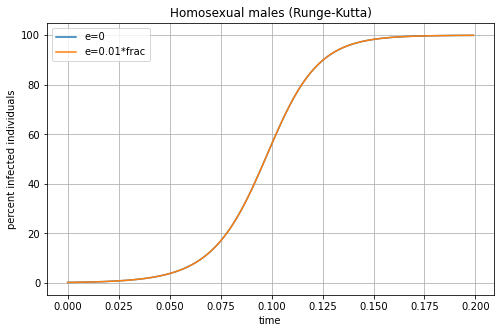

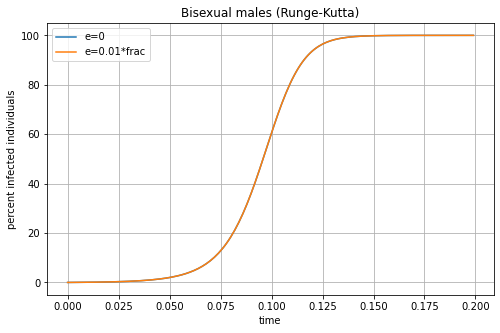

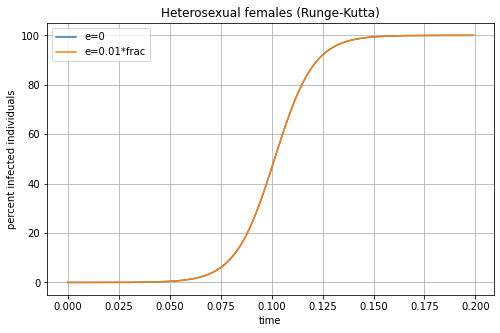

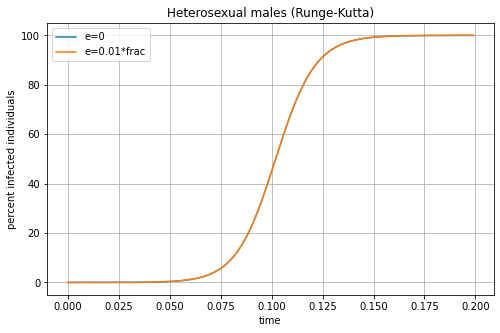

In [15]:
#Here I compare the solutions for e=0.01*frac with the solutions for e=0

#e=0.01*frac
sol2_E, t2_E = forward_euler(F2_restricted, var0=np.array([0.01, 0, 0, 0]), dt=0.0001, t_max=0.2)
sol2_RK, t2_RK = fourth_runge_kutta(F2_restricted, var0=np.array([0.01, 0, 0, 0]), dt=0.001, t_max=0.2)

#e=0
sol_E, t_E = forward_euler(F_restricted, var0=np.array([0.01, 0, 0, 0]), dt=0.0001, t_max=0.2)
sol_RK, t_RK = fourth_runge_kutta(F_restricted, var0=np.array([0.01, 0, 0, 0]), dt=0.001, t_max=0.2)


#Plot the results

for i in range(4):
    plt.figure(figsize=(8,5))
    plt.grid()
    plt.plot(t_E, sol_E[i,:]/pop[i]*100, label="e=0")
    plt.plot(t2_E, sol2_E[i,:]/pop[i]*100, label="e=0.01*frac")
    plt.title(f"{lables[i]} (Forward Euler)")
    plt.ylabel("percent infected individuals")
    plt.xlabel("time")
    plt.legend()

for i in range(4):
    plt.figure(figsize=(8,5))
    plt.grid()
    plt.plot(t_RK, sol_RK[i,:]/pop[i]*100, label="e=0")
    plt.plot(t2_RK, sol2_RK[i,:]/pop[i]*100, label="e=0.01*frac")
    plt.title(f"{lables[i]} (Runge-Kutta)")
    plt.ylabel("percent infected individuals")
    plt.xlabel("time")
    plt.legend()

In [16]:
#I add the effect of removal/death to the ODEs

def F3(t, var, par, remove):
    a1, a2, b1, b2, b3, c1, c2, d1 = par
    remove1, remove2, remove3, remove4 = remove
    
    x1, x2, y, z, p1, p2, q, r = var
    
    frac = (x1 + x2 + y + z) / (p1 + p2 + q + r)
    e = 0.01 * frac
    
    dx1dt = a1 * x1 * (p1 - x1) + a2 * x2 * (p1 - x1) + e * (p1 - x1) - remove1 * x1
    dx2dt = b1 * x1 * (p2 - x2) + b2 * x2 * (p2 - x2) + b3 * y * (p2 - x2) + e * (p2 - x2) - remove2 * x2
    dydt = c1 * x2 * (q - y) + c2 * z * (q - y) + e * (q - y) - remove3 * y
    dzdt = d1 * y * (r - z) + e * (r - z) - remove4 * z
    
    #In addition to updating the original differential equations with the rate of removal, I also add four new ODEs in order to also update the population sizes due to removal
    dp1dt = - remove1 * x1
    dp2dt = - remove2 * x2
    dqdt = - remove3 * y
    drdt = - remove4 * z
    
    return np.array([dx1dt, dx2dt, dydt, dzdt, dp1dt, dp2dt, dqdt, drdt])

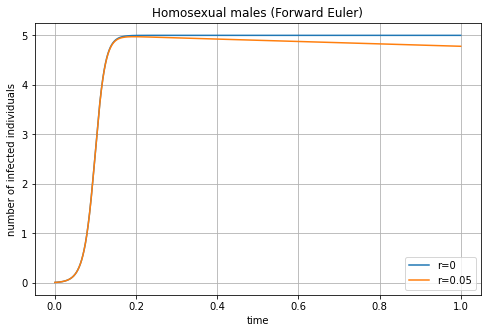

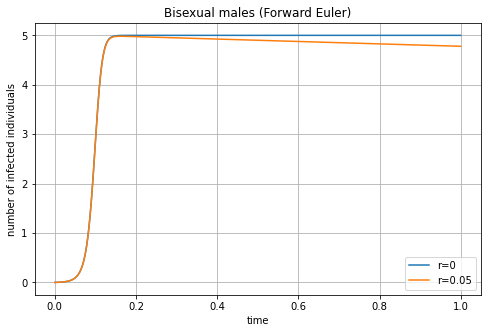

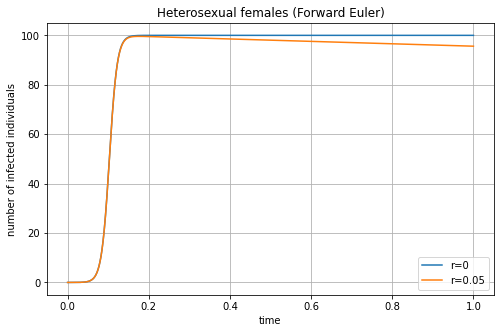

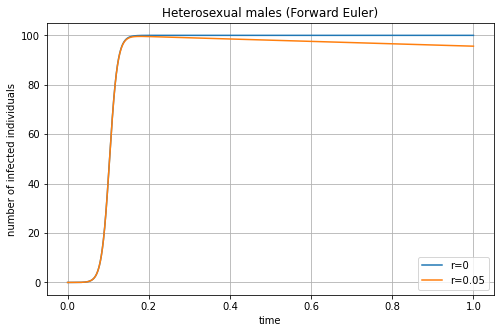

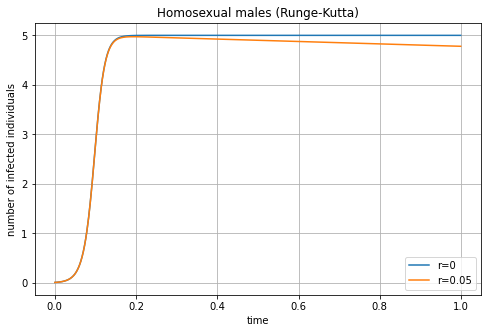

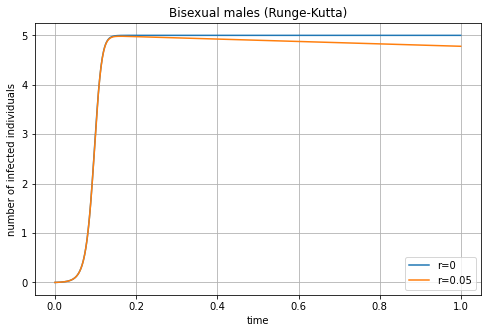

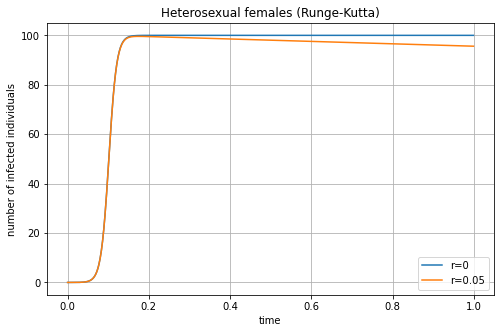

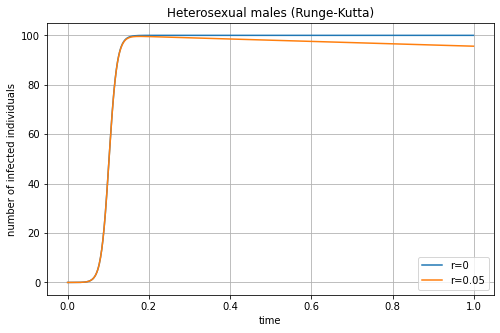

In [17]:
#I start with removal parameters of 0.05 and compare with the results without removal

def F3_restricted(t, var):  #restrict ODEs to the parameters given in the assignment and removal parameter of 0.05
    par = np.array([10, 5, 5, 1, 1, 1, 1, 1])
    remove = np.ones(4) * 0.05  #I set the removal parameter equal for all four groups
    return F3(t, var, par, remove)

#r=0.05
sol3_E, t3_E = forward_euler(F3_restricted, var0=np.array([0.01, 0, 0, 0, 5, 5, 100, 100]), dt=0.0001, t_max=1)
sol3_RK, t3_RK = fourth_runge_kutta(F3_restricted, var0=np.array([0.01, 0, 0, 0, 5, 5, 100, 100]), dt=0.001, t_max=1)

#r=0
sol2_E, t2_E = forward_euler(F2_restricted, var0=np.array([0.01, 0, 0, 0]), dt=0.0001, t_max=1)
sol2_RK, t2_RK = fourth_runge_kutta(F2_restricted, var0=np.array([0.01, 0, 0, 0]), dt=0.001, t_max=1)

#Plot the results
for i in range(4):
    plt.figure(figsize=(8,5))
    plt.grid()
    plt.plot(t2_E, sol2_E[i,:], label="r=0")
    plt.plot(t3_E, sol3_E[i,:], label="r=0.05")
    plt.title(f"{lables[i]} (Forward Euler)")
    plt.ylabel("number of infected individuals")
    plt.xlabel("time")
    plt.legend()

for i in range(4):
    plt.figure(figsize=(8,5))
    plt.grid()
    plt.plot(t2_RK, sol2_RK[i,:], label="r=0")
    plt.plot(t3_RK, sol3_RK[i,:], label="r=0.05")
    plt.title(f"{lables[i]} (Runge-Kutta)")
    plt.ylabel("number of infected individuals")
    plt.xlabel("time")
    plt.legend()

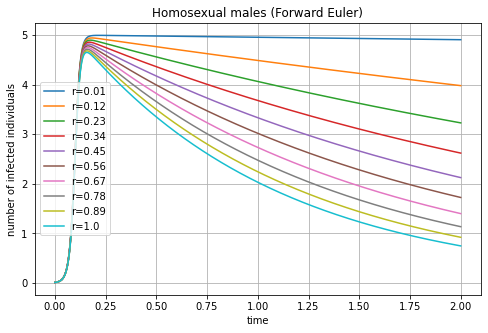

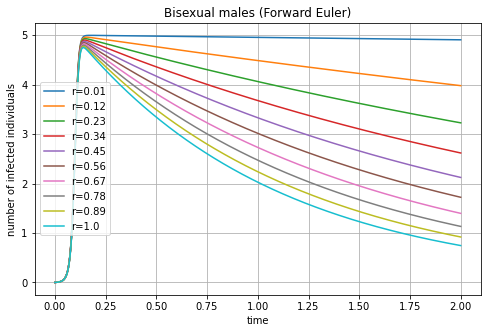

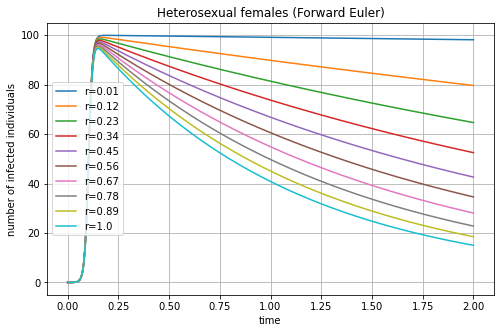

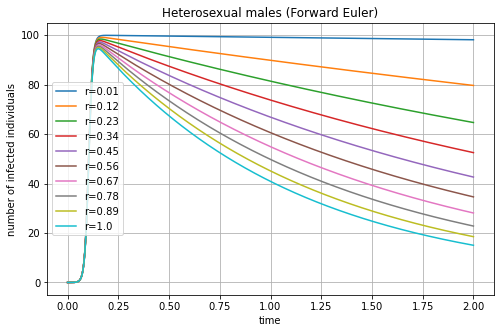

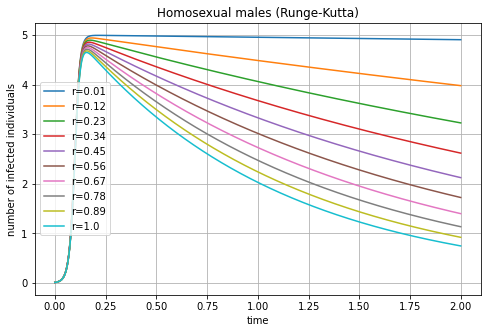

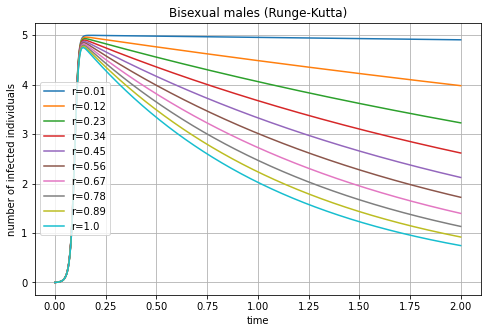

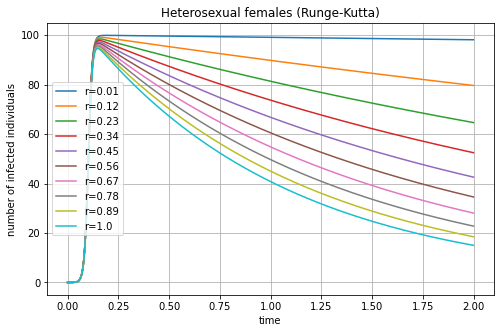

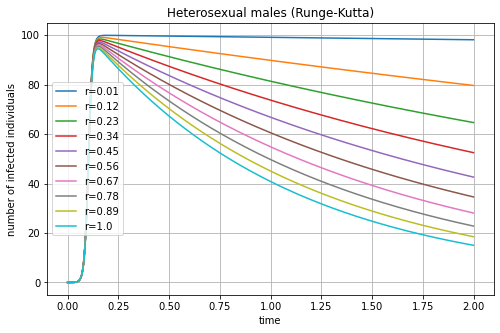

In [18]:
r_array = np.linspace(0.01, 1, 10)  #I want to simulate 10 removal parameters between 0.01 and 1

sol3_E_r = []  #initialize lists for solutions
sol3_RK_r = []

for r_i in r_array:   
    
    def F3_restricted(t, var):  #restrict ODEs to the parameters given in the assignment and the current value of the removal parameter
        par = np.array([10, 5, 5, 1, 1, 1, 1, 1])
        remove = np.ones(4) * r_i  #I set the removal parameter equal for all four groups
        return F3(t, var, par, remove)
    
    #solve the ODEs
    sol3_E, t3_E = forward_euler(F3_restricted, var0=np.array([0.01, 0, 0, 0, 5, 5, 100, 100]), dt=0.0001, t_max=2)
    sol3_RK, t3_RK = fourth_runge_kutta(F3_restricted, var0=np.array([0.01, 0, 0, 0, 5, 5, 100, 100]), dt=0.001, t_max=2)
    
    sol3_E_r.append(sol3_E)
    sol3_RK_r.append(sol3_RK)
    

#Plot the results
for i in range(4):
    plt.figure(figsize=(8,5))
    plt.grid()
    for j in range(len(r_array)):
        plt.plot(t3_E, sol3_E_r[j][i,:], label=f"r={np.round(r_array[j], 4)}")
        plt.title(f"{lables[i]} (Forward Euler)")
        plt.ylabel("number of infected individuals")
        plt.xlabel("time")
        plt.legend()
        
for i in range(4):
    plt.figure(figsize=(8,5))
    plt.grid()
    for j in range(len(r_array)):
        plt.plot(t3_RK, sol3_RK_r[j][i,:], label=f"r={np.round(r_array[j], 4)}")
        plt.title(f"{lables[i]} (Runge-Kutta)")
        plt.ylabel("number of infected individuals")
        plt.xlabel("time")
        plt.legend()

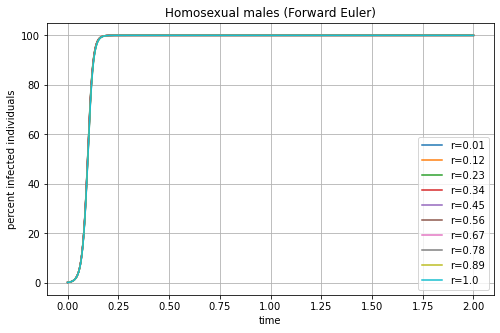

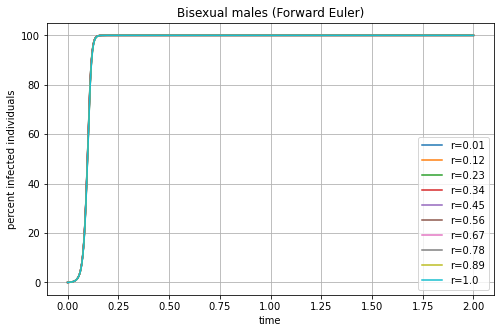

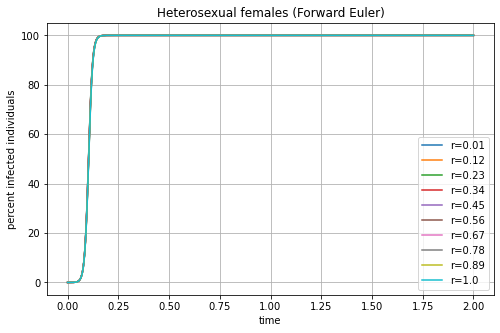

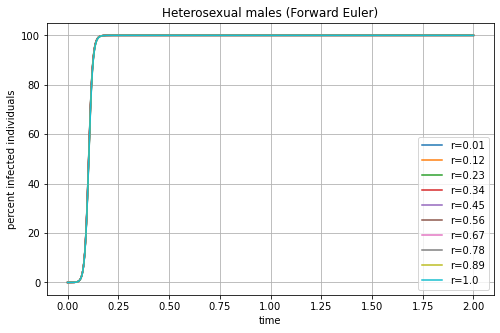

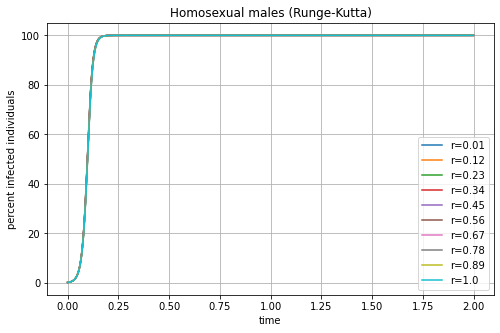

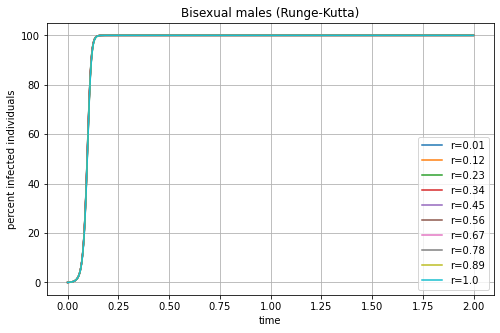

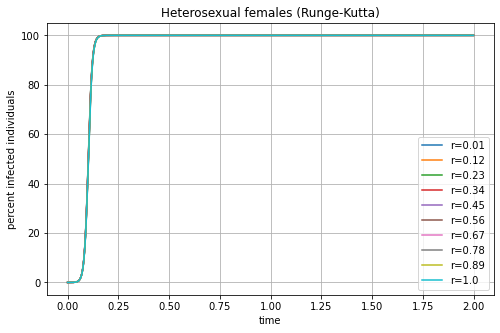

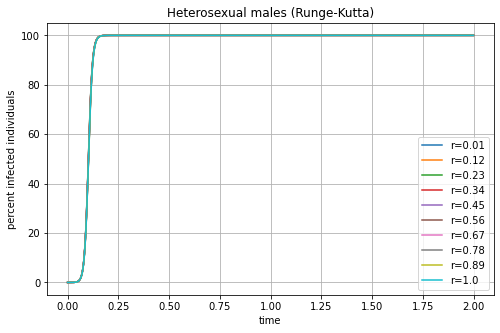

In [19]:
#Here I have plotted the percent of infected individuals in each group as a function of time
#Because I have added removal, at each time step I should divide the number of infected people in a group with the total size of the group population at that timestep

for i in range(4):
    plt.figure(figsize=(8,5))
    plt.grid()
    for j in range(len(r_array)):
        plt.plot(t3_E, sol3_E_r[j][i,:]/sol3_E_r[j][i+4,:]*100, label=f"r={np.round(r_array[j], 4)}")
        plt.title(f"{lables[i]} (Forward Euler)")
        plt.ylabel("percent infected individuals")
        plt.xlabel("time")
        plt.legend()
        
for i in range(4):
    plt.figure(figsize=(8,5))
    plt.grid()
    for j in range(len(r_array)):
        plt.plot(t3_RK, sol3_RK_r[j][i,:]/sol3_RK_r[j][i+4,:]*100, label=f"r={np.round(r_array[j], 4)}")
        plt.title(f"{lables[i]} (Runge-Kutta)")
        plt.ylabel("percent infected individuals")
        plt.xlabel("time")
        plt.legend()

I notice that for the parameters given in the assignemt, 100 % of the population in all groups still end up getting infected. The reason the number of infected individuals in a group starts declining in the plots above is simply that the population gets smaller due to the removal.